In [1]:
import pandas as pd 
import json
from pandas.io.json import json_normalize 

In [ ]:
##########Carga con Pandas###########

In [3]:
import time
#exportación y lectura con pandas
inicio = time.time()

pd_Pandas = pd.read_csv('df_data.csv',
                        names='uno')
fin = time.time()

calcultedPD = fin-inicio
print("Cálculo de extracción y lectura con Pandas = {}".format(calcultedPD))

Cálculo de extracción y lectura con Pandas = 1.9706087112426758


In [ ]:
########Transformación con Pandas################

In [5]:
#convertir en lista y despues en json
import time
startSecuenciaCPU = time.time()
data = list(pd_Pandas['u'])
da = []
for i in range(0,len(data)):
    d = data[i].split('.gz:')
    da.append(json.loads((d[1])))
    
#DataFrame PANDAS
new_data = pd.DataFrame(da)

#solo conservo los datos de la columna username
#mayor a 0
snNull = new_data[new_data.username.map(len) > 0]

#eliminar username dicc y opencampus
snDicc = snNull[snNull.username != 'dicc']
snCampus = snDicc[snDicc.username != 'opencampus']

#eliminar filas con los datos perdidos
snCampus.dropna(axis=0, how='any')

#Eliminar columnas innecesarias no tiene relevancia
snCampus.drop(['accept_language'],axis=1, inplace=True)
snCampus.drop(['name'], axis=1, inplace=True)
snCampus.drop(['agent'], axis=1, inplace=True)
snCampus.drop(['page'], axis=1, inplace=True)
snCampus.drop(['session'], axis=1, inplace=True)
snCampus.drop(['event'], axis=1, inplace=True)
snCampus.drop(['event_type'], axis=1, inplace=True)


#eliminar filas con datos perdidos
snCampus.dropna(axis=0, how='any')



dataLimpia = snCampus

#Dividir toda la columna context
contextData = dataLimpia['context'].values.tolist()
new_contextData = pd.DataFrame(contextData, columns= ['course_user_tags',
                                                      'course_id', 'path',
                                                      'org_id', 'user_id'])
generalData = pd.merge(dataLimpia.reset_index(),
                       new_contextData.reset_index(),
                       left_index=True, right_index=True)
generalData = generalData.drop(['context'], axis=1)
generalData = generalData.drop(['index_y'], axis=1)
generalData = generalData.drop(['course_user_tags'], axis=1)
generalData = generalData.drop(['course_id'], axis=1)
generalData = generalData.drop(['path'], axis=1)

#eliminar filas con datos perdidos
generalData.dropna(axis=0, how='any')

#soltar duplicados
snCampus.sort_values("username") 
snCampus.drop_duplicates(subset='username',
                         keep=False, inplace=False)


#dividir columna time
df_picru = pd.DataFrame(generalData['time'])
datenew = df_picru.apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%Y-%m-%d'))

datenew['Day'] = datenew['time'].dt.day
datenew['Month'] = datenew['time'].dt.month
datenew['Year'] = datenew['time'].dt.year
datenew['Hour'] = datenew['time'].dt.time

datenew = datenew.drop(['time'], axis=1)
datenew = datenew.drop(['Hour'], axis=1)

#Unir todo el dataframe time al general
generalData = pd.merge(generalData.reset_index(),
                       datenew.reset_index(),
                       left_index=True, right_index=True)
generalData = generalData.drop(['time', 'index_x', 'index_y'], axis=1)
#generalData = generalData.drop(['index_x'], axis=1)
#generalData = generalData.drop(['index_y'], axis=1)

#eliminar filas con datos perdidos
generalData.dropna(axis=0, how='any')

#resetear index
generalData = generalData.reset_index()
generalData = generalData.drop(['index'], axis=1)

endSecuenciaCPU = time.time()
cpuPandas = endSecuenciaCPU - startSecuenciaCPU

print('Cálculo de transformación cpu-Pandas:', cpuPandas)

Cálculo de transformación cpu-Pandas: 7.779047250747681


In [6]:
#Información de toda la data con Pandas
print('Nomnres de las columnas:',generalData.columns)
print('Dimension del DataFrame:',generalData.shape)
print('Tipos de datos de cada columna', generalData.dtypes)
print('Información DATA general con Pandas:')
generalData.head(2)

Nomnres de las columnas: Index(['username', 'event_source', 'host', 'referer', 'ip', 'org_id',
       'user_id', 'Day', 'Month', 'Year'],
      dtype='object')
Dimension del DataFrame: (196867, 10)
Tipos de datos de cada columna username        object
event_source    object
host            object
referer         object
ip              object
org_id          object
user_id          int64
Day              int64
Month            int64
Year             int64
dtype: object
Información DATA general con Pandas:


,username,event_source,host,referer,ip,org_id,user_id,Day,Month,Year
0,FrankVac,server,opencampus.utpl.edu.ec,http://opencampus.utpl.edu.ec/courses,200.105.237.152,UTPL,10838,10,11,2017
1,FrankVac,server,opencampus.utpl.edu.ec,http://opencampus.utpl.edu.ec/courses/course-v...,200.105.237.152,,10838,10,11,2017


In [ ]:
######Carga con Pandas############

In [7]:
#Guardar la data entendible en un nuevo csv
import time
start = time.time()

da_data = 'data_mejoraPandas.csv'#los datos de las 100000
generalData.to_csv(da_data)#los datos de las 100000

end = time.time()
calculated = end - start

print("Cálculo de carga cpu-Pandas = {}".format(calculated))

Cálculo de carga cpu-Pandas = 2.3849446773529053


In [8]:
nueva_data = pd.read_csv('data_mejoraPandas.csv')#los datos de las 100000
nueva_data = nueva_data.drop(['Unnamed: 0'],axis=1)

print('Tipos de datos de cada columna', nueva_data.dtypes)
print('Información Data')
nueva_data.head(2)

Tipos de datos de cada columna username        object
event_source    object
host            object
referer         object
ip              object
org_id          object
user_id          int64
Day              int64
Month            int64
Year             int64
dtype: object
Información Data


,username,event_source,host,referer,ip,org_id,user_id,Day,Month,Year
0,FrankVac,server,opencampus.utpl.edu.ec,http://opencampus.utpl.edu.ec/courses,200.105.237.152,UTPL,10838,10,11,2017
1,FrankVac,server,opencampus.utpl.edu.ec,http://opencampus.utpl.edu.ec/courses/course-v...,200.105.237.152,NaN,10838,10,11,2017


In [ ]:
#####Proceso Machine learning########

In [9]:
import time
from sklearn.model_selection import train_test_split

#inicio_Split = time.time()

#Fase1 de Dividir dataset con sklearn
#Asignar dataset general a nuevas variables
pd_dataX = nueva_data
pd_dataY = nueva_data

#Dividir datasets en train y test
#datatrain 80% y datatest 20%
X_train, X_test, y_train, y_test = train_test_split(pd_dataX, pd_dataY, train_size=0.8)

#información
print(f'Dataset Original: {pd_dataX.shape[0], pd_dataY.shape[0]} elementos')
print(f'Data X_train: {X_train.shape[0]} elementos')
print(f'Data X_test: {X_test.shape[0]} elementos')
print(f'Data y_train: {y_train.shape[0]} elementos')
print(f'Data y_test: {y_test.shape[0]} elementos')
print('')

#fin_Split = time.time()
#calculo_Split_ML = fin_Split - inicio_Split

#print("Cálculo fase dividir dataset con sklearn cpu-sklearn = {}".format(calculo_Split_ML))

Dataset Original: (196867, 196867) elementos
Data X_train: 157493 elementos
Data X_test: 39374 elementos
Data y_train: 157493 elementos
Data y_test: 39374 elementos



In [10]:
import time
from sklearn import preprocessing

inicio_Pre = time.time()

#Fase Preprocesamiento con sklearn
le = preprocessing.LabelEncoder()

#seleccionar columnas potenciales para work train de xTrain
value_usernameX = le.fit_transform(X_train.username)
value_EventSourceX = le.fit_transform(X_train.event_source)
value_DayX = le.fit_transform(X_train.Day)

#seleccionar columnas potenciales para work train de xTest
value_usernameXT = le.fit_transform(X_test.username)
value_EventSourceXT = le.fit_transform(X_test.event_source)
value_DayXT = le.fit_transform(X_test.Day)

#seleccionar columnas potenciales para work train de yTrain
value_usernameY = le.fit_transform(y_train.username)
value_EventSourceY = le.fit_transform(y_train.event_source)
value_DayY = le.fit_transform(y_train.Day)

#seleccionar columnas potenciales para work train de yTest
value_usernameYT = le.fit_transform(y_test.username)
value_EventSourceYT = le.fit_transform(y_test.event_source)
value_DayYT = le.fit_transform(y_test.Day)

fin_Pre = time.time()
calculo_Pre_ML = fin_Pre - inicio_Pre

print("Cálculo fase preprocesamiento con sklearn = {}".format(calculo_Pre_ML))

Cálculo fase preprocesamiento con sklearn = 0.14246439933776855


In [12]:
import time
import numpy as np
from sklearn.linear_model import LinearRegression

#Fase Uso de Algoritmo ML con sklearn
#Algoritmo LinearRegression

inicio_ML = time.time()

#Creación de un nuevo dataframe Train
dataTrain = pd.DataFrame()
dataTrain['username'] = np.array(value_usernameX, dtype=np.float32)
dataTrain['day'] = np.array(value_DayX, dtype=np.float32)

#Creación de un nuevo dataframe Test
new_value = np.array(value_usernameY, dtype=np.float32)
dataY = pd.Series(new_value)

lr_reg = LinearRegression(fit_intercept= True, normalize = False)
reg = lr_reg.fit(dataTrain, dataY)

fin_ML = time.time()
calculo_Algorit_ML = fin_ML - inicio_ML

print("Algoritmo Regresión Lineal")
print("Coeficientes:")
print(reg.coef_)
print("Intercepción:")
print(reg.intercept_)
print('Predicción del modelo:')
print(lr_reg.predict(dataTrain))
print('')

print("Cálculo fase de entrenamiento algoritmo Machine Learning Regresión Lineal con sklearn = {}".format(calculo_Algorit_ML))

Algoritmo Regresión Lineal
Coeficientes:
[9.9998873e-01 1.9734823e-07]
Intercepción:
0.0026245117
Predicción del modelo:
[218.00017 502.99695 218.00017 ... 218.00017 213.00023 487.99713]

Cálculo fase de entrenamiento algoritmo Machine Learning Regresión Lineal con sklearn = 0.018362760543823242


In [27]:
#Algoritmo Regresión Logística de sklearn
import time
import numpy as np
from sklearn.linear_model import LogisticRegression

inicio_RL = time.time()

#Creación de un nuevo dataframe Train 
dataTrain = pd.DataFrame()
dataTrain['username'] = np.array(value_usernameX, dtype=np.float32)
dataTrain['day'] = np.asarray(value_DayX, dtype=np.float32)

#Creación de un nuevo dataframe Test
new_value = np.array(value_usernameY, dtype=np.float32)
dataTest = pd.Series(new_value)

reg = LogisticRegression(fit_intercept = True,
                         max_iter = 100)
reg.fit(dataTrain, dataTest)

fin_RL = time.time()
calculo_RL = fin_RL - inicio_RL

print("Coefficients:")
print(reg.coef_)
print("Intercept:")
print(reg.intercept_)
print('Predicción del modelo:')
print(reg.predict(dataTrain))
print('')

print("Cálculo del algoritmo Regresión Logistica con sklearn = {}".format(calculo_RL))

/opt/conda-environments/rapids-stable/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficients:
[[-0.04385441  0.02638805]
 [-0.04322538 -0.00532829]
 [-0.03796391  0.03025186]
 ...
 [ 0.02567653 -0.06974698]
 [ 0.02639025 -0.05855295]
 [ 0.0329549  -0.17547911]]
Intercept:
[ 1.51583104e-03 -5.03869542e-04  3.14182007e-03  1.15846636e-02
 -5.04548604e-04 -5.04638624e-04 -5.43007796e-04  2.84863178e-02
  4.08885878e-02 -5.04761721e-04 -5.43166078e-04 -3.52800748e-04
 -3.90128996e-04  1.65396586e-02  2.42746426e-02 -4.29424290e-04
 -4.67541395e-04  2.99621412e-03  3.55703997e-03  8.45481827e-04
  6.52163926e-03  1.61481850e-02 -4.30840512e-04  2.84391460e-02
 -5.06575511e-04  7.32151463e-03 -5.06953283e-04 -4.69738294e-04
 -5.06940135e-04 -4.32531492e-04  7.42678283e-03 -4.33124167e-04
 -4.33134524e-04 -4.70832094e-04 -4.33552382e-04  1.56012336e-03
  1.65629264e-02 -4.34734122e-04 -5.07811769e-04 -5.44864597e-04
 -3.26678174e-04 -4.35421380e-04  2.31641117e-03 -4.35511040e-04
  4.01710450e-03  5.18463705e-03  1.39725030e-02 -4.00334220e-04
  9.59858768e-04  1.6503711

In [ ]:
#######Visualización########

Cálculo del proceso de Visualización gráfico Barras cpu-matplotlib = 191.22422695159912


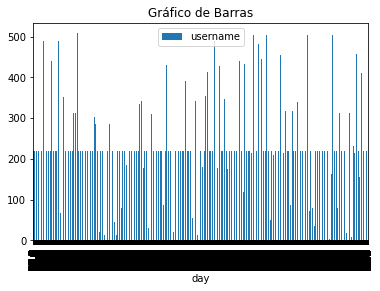

In [28]:
import matplotlib.pyplot as plt

inicio_grafico = time.time()

dataTrain.plot(kind='bar', x='day',y='username', title='Gráfico de Barras',  width=0.5)

fin_grafico = time.time()

calculo_grafico = fin_grafico - inicio_grafico

print("Cálculo del proceso de Visualización gráfico Barras cpu-matplotlib = {}".format(calculo_grafico))

plt.show()
plt.close('all')

In [ ]:
#Detalles del proceso con otras herramientas

In [ ]:
#Algoritmo Random Forest de sklearn
"""
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

inicioRF = time.time()

dataTrainUSER = np.array(value_usernameX, dtype=np.float32)
dataTestUSER = np.array(value_usernameY, dtype=np.int32)

dataTrainUSER, dataTestUSER = make_classification(n_samples=10, n_features=4,
                                                 n_informative=2, n_redundant=0,
                                                 random_state=0)

sk_modelRDF = RandomForestClassifier(max_features=1.0,
                             min_samples_split = 2,
                             n_estimators=2)

sk_modelRDF.fit(dataTrainUSER, dataTestUSER)
sk_predict = sk_modelRDF.predict(dataTrainUSER)

finRF = time.time()
calculoRF = finRF - inicioRF

print('Predict labels:', sk_predict)
print('')

print("Cálculo fase de entrenamiento algoritmo Random Forest con sklearn = {}".format(calculoRF))
"""